# Unsupervised Learning
## Independent Component Analysis - Sklearn Implementation

Author: Bingchen Wang

Last Updated: 19 Oct, 2022

---
<nav>
    <a href="../../Machine%20Learning.ipynb">Machine Learning</a> |
    <a href="../Unsupervised Learning.ipynb">Unsupervised Learning</a> |
</nav>

---

## Content

- [Import packages](#IP)
- [Import the handwritten digits dataset](#ID)
- [Run ICA on the handwritten digits 3](#ICA)
- [Visualise the most prominent digits for each ICA](#ICA_vis)
- [Blind source separation](#BSS)

<a name = "IP"></a>
### Import packages

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from pandas.plotting import scatter_matrix

<a name = "ID"></a>
### Import the handwritten digits dataset

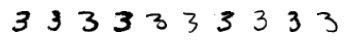

In [3]:
from keras.datasets import mnist
(X, Y), (_,_) = mnist.load_data()
X = 255 - X
threes = X[Y==3]
fig, axes = plt.subplots(1,10)
for i in range(10):
    axes[i].imshow(threes[i], cmap = plt.get_cmap('gray'))
    axes[i].set_axis_off()
plt.show()

<a name = "ICA"></a>
### Run ICA on the handwritten digits 3

In [6]:
threes_flattened = threes.reshape(-1, threes.shape[1]*threes.shape[2])

In [74]:
ica = FastICA()
ics = ica.fit_transform(threes_flattened)

/Users/bingchenwang/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/bingchenwang/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [15]:
first_five_ics = ics[:,:5]
df_first_five_ics = pd.DataFrame(first_five_ics, columns=["IC1", "IC2", "IC3", "IC4", "IC5"])

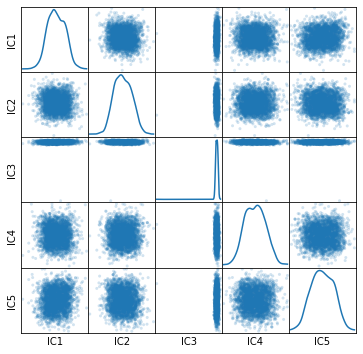

In [43]:
np.random.seed(1)
randomidx = np.random.choice(len(df_first_five_ics), size = (3000,), replace= False)
sm = scatter_matrix(df_first_five_ics.loc[randomidx], alpha = 0.2, figsize = (6,6), diagonal = 'kde')
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.show()

<a name = "ICA_vis"></a>
### Visualising the most prominent digits for each ICA

In [59]:
extreme_positive_digits_idx = np.argsort(first_five_ics, axis = 0)[-2:,:]
extreme_negative_digits_idx = np.argsort(first_five_ics, axis = 0)[:2,:]
extreme_digits_idx = np.vstack((extreme_positive_digits_idx, extreme_negative_digits_idx))
mean_digits = np.argmin(np.linalg.norm(first_five_ics, axis = 1), axis = 0)

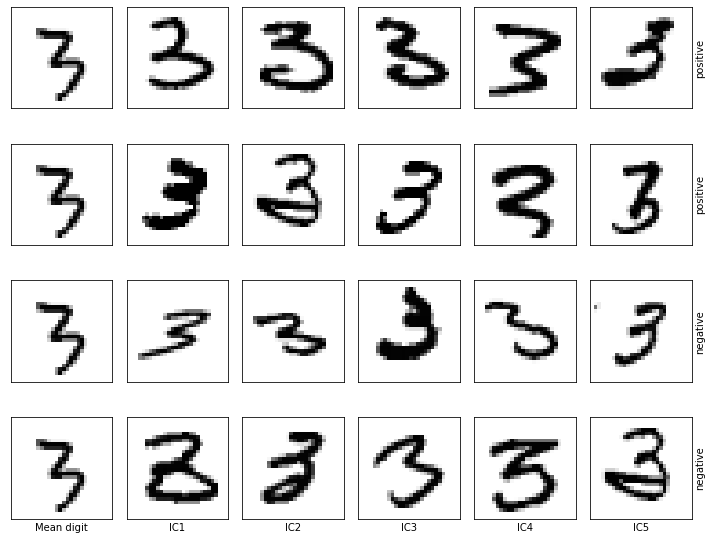

In [72]:
fig, ax = plt.subplots(4,6, figsize = (10,8))
for i in range(4):
    ax[i,0].imshow(threes[mean_digits], cmap = plt.get_cmap("gray"))
    ax[i,0].xaxis.set_ticks([])
    ax[i,0].yaxis.set_ticks([])
    if i == 3:
        ax[i,0].set_xlabel("Mean digit")
    
for i in range(4):
    for j in range(5):
        ax[i,j+1].imshow(threes[extreme_digits_idx[i,j]], cmap = plt.get_cmap("gray"))
        ax[i,j+1].xaxis.set_ticks([])
        ax[i,j+1].yaxis.set_ticks([])
        if j == 4:
            if i <= 1:
                ax[i,j+1].set_ylabel("positive")
            else:
                ax[i,j+1].set_ylabel("negative")
            ax[i,j+1].yaxis.set_label_position("right")
        if i == 3:
            ax[i,j+1].set_xlabel(f"IC{j+1}")
            
fig.tight_layout()
plt.show()

<a name = "BSS"></a>
### Blind source separation

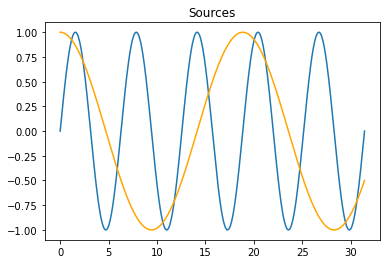

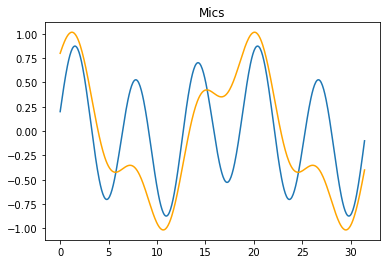

In [105]:
x = np.linspace(0, 10*np.pi, 500)
source_1 = np.sin(x)
source_2 = np.cos(x/3)
plt.plot(x, source_1)
plt.plot(x, source_2, color = "orange")
plt.title("Sources")
plt.show()
mic_1 = 0.7 * source_1 + 0.2 * source_2
mic_2 = 0.3 * source_1 + 0.8 * source_2

plt.plot(x, mic_1)
plt.plot(x, mic_2, color = "orange")
plt.title("Mics")
plt.show()

obs = np.vstack((mic_1, mic_2))

In [107]:
obs = obs.transpose()

/Users/bingchenwang/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


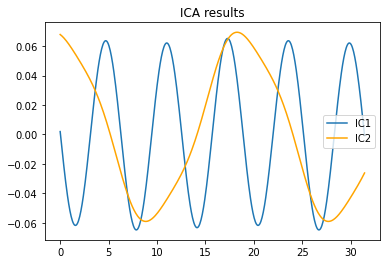

In [108]:
ica2 = FastICA()
ics2 = ica2.fit_transform(obs)

plt.plot(x, ics2[:,0], label = "IC1")
plt.plot(x, ics2[:,1], color = "orange", label = "IC2")
plt.legend()
plt.title("ICA results")
plt.show()

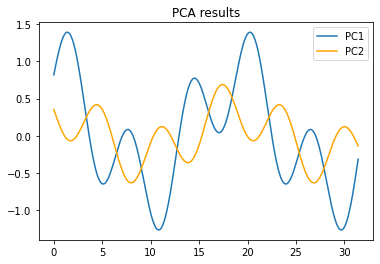

In [110]:
pca = PCA()
pca = pca.fit_transform(obs)

plt.plot(x, pca[:,0], label = "PC1")
plt.plot(x, pca[:,1], color = "orange", label = "PC2")
plt.legend()
plt.title("PCA results")
plt.show()